<a href="https://colab.research.google.com/github/yahito/kibana-plugin/blob/main/Copy_of_%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D1%80%D0%BD%D0%B8%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%B9_FCN_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализация модернизированной FCN сети
В этом уроке мы создадим модернизированную FCN модель с использованием изученных слоёв, которая потенциально должна выдвать более высокое качество на реальных задачах по семантической сегментации.

### Загрузка необходимых библиотек
Здесь мы загружаем разоичные библиотеки, включая TensoFlow.


In [2]:
import numpy as np

import tensorflow as tf
# tf.enable_eager_execution()
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.8.0


### Создание FCN модели
Для создания модели создадим собственный класс, наследованный от `tf.keras.Model`.
Ранее мы использовали лишь свёртки и пулинги для извлечения признаков и понижения пространственных размерностий. Это был наш Энкодер. В качестве Декодера у нас был простой Upscale слой, который просто расширял изображение до нужного размера. Теперь же давайте реализуем более качественный Декодер с использованием слоёв для повышения разрешения.

В примере ниже будем использовать Unpooling (в керасе это делает слой `tf.keras.layers.UpSampling2D`) перемежающиийся со свёрточными слоями.

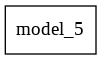

In [8]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu') # 1, 64, 64, 3
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu') # 1, 64, 64, 3     
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu') # 1, 128, 128, 3     
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu') # 1, 256, 256, 3        
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')    
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pool = tf.keras.layers.MaxPool2D((2, 2))
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
                
    def call(self, x):
      
        # Encoder
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pool(out)        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.pool(out)        
        out = self.conv5(out)
        out = self.conv6(out)
        
        # Decoder        
        out = self.unpool(out)        
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.unpool(out)        
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.conv11(out)

        return out
    
model = Model()
model.build([1, 256, 256, 3])
tf.keras.utils.plot_model(model)

### Задания


**[ЗАДАНИЕ 1]** Для такой модели для каждого промежуточного тензора с картами признаков укажите его размерности. Другими словами, для каждого вычисленного тензора `out` в каждой строчке функции `call()` выпишите его размерность, основываясь лишь на числах из конструктора. Размерность тензора `x` считать равной [1, 256, 256, 3]


**[ЗАДАНИЕ 2]** Создайте новую модель, аналогичную описанной выше, в котрой замените все Pooling слои на свёрточные слои со страйдом 2

In [9]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu') # 1, 64, 64, 3
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu') # 1, 64, 64, 3     
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu') # 1, 128, 128, 3     
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu') # 1, 256, 256, 3        
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')    
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pool = tf.keras.layers.MaxPool2D((2, 2))
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
                
    def call(self, x):
      
        # Encoder
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)
        
        # Decoder        
        out = self.unpool(out)        
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.unpool(out)        
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.conv11(out)

        return out
    
model = Model()


**[ЗАДАНИЕ 3]** Реализуйте одну из написанных моделей (исходную или из Задания 2) с помощью функционального API кераса. Входом в модель сделайте узел `tf.keras.layers.Input((256, 256, 3))`. После этого визуализализируйте полученную модель с помощью `tf.keras.utils.plot_model(model, show_shapes=True)`. Проверьте размерности выходов всех слоёв, сравние с ответом из Задания 1.


**[ЗАДАНИЕ 4]** Реализуйте пайплайн обучения для такой модели (одной из): подготовка данных, лосс, обучение, тестирование. Используйте материалы из предыдущего практического урока. Обучите модель и сравните время обучения с временем обучения простой FCN из предыдущего урока.

In [11]:
import imageio
img = imageio.imread('me_256.png')
img = img.astype(np.float32) / 255.
gt = imageio.imread('me_gt_256.png')
gt = gt.astype(np.float32) / 255.
gt = np.mean(gt, axis=2)[...,None]


train_x = np.stack((img, img[:,::-1,:]))
train_y = np.stack((gt, gt[:,::-1,:]))

loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss)

history = model.fit(train_x, train_y, batch_size=1, epochs=100)


Epoch 1/100
2/2 [==============================] - 12s 26ms/step - loss: 0.6878
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.7233
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.6691
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 0.6323
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 0.4311
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2517
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2752
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2792
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2700
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2369
Epoch 11/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2307
Epoch 12/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2160
Epoch 13/100
2/2 [==============================

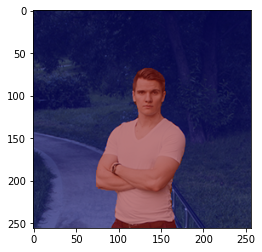

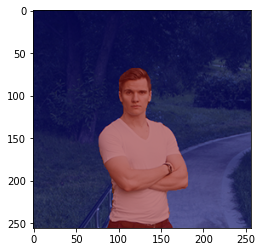

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

for sample in train_x:
    out = model.predict(sample[None, ...])
    seg_map = (out[0, ..., 0]>0.5).astype(np.float32)
    seg_map_clr = plt.get_cmap('jet')(seg_map)[..., :3]
    plt.imshow(sample*0.5 + seg_map_clr*0.5)
    plt.show()